In [13]:
# Media Content Analytics Platform - Data Analysis Notebook
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [14]:
#  Load Processed Datasets


news_path = "../data/processed/NEWS_yahoo_11cols.csv"
yt_path = "../data/processed/dim_video.csv"

news_df = pd.read_csv(news_path)
yt_df = pd.read_csv(yt_path)

print("✅ Files loaded successfully.")
print(f"News dataset shape: {news_df.shape}")
print(f"YouTube dataset shape: {yt_df.shape}")

display(news_df.head())
display(yt_df.head())


✅ Files loaded successfully.
News dataset shape: (15975, 11)
YouTube dataset shape: (20, 11)


,id,headline,news_text,sentiment,source,category,publish_date,word_count,char_count,sentiment_label,text_length_category
0,0,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,0,Yahoo Finance,Technology,2022-07-09,585,3265,Negative,Long
1,1,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,0,Yahoo Finance,World,2024-06-08,1829,11293,Negative,Long
2,2,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,0,Yahoo Finance,Technology,2023-02-22,438,2425,Negative,Long
3,3,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,0,Yahoo Finance,Economy,2022-04-25,588,3502,Negative,Long
4,4,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,0,Yahoo Finance,Economy,2022-08-30,311,1875,Negative,Long


,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,region,latitude,longitude
0,-aSBct_gl-8,Why Big Tech Companies Want to Build AI Data C...,Firstpost,2025-11-05 17:19:31+00:00,106870,1636,NaN,194,Global,55.702215,12.559249
1,u7Mu7AAiabo,Good News for Battery Progress!,Sabine Hossenfelder,2025-11-04 16:01:32+00:00,593192,24550,NaN,1736,Global,55.702215,12.559249
2,znaNVWPSx68,"Tech News 2056 || realme GT 8 Pro, OPPO Find X...",Prasadtechintelugu,2025-11-06 14:24:14+00:00,162877,11377,NaN,490,Global,55.702215,12.559249
3,gkklrVa8amY,The Most Futuristic Tech Of 2025.....,TechWiser,2025-03-06 10:09:46+00:00,962412,61677,NaN,220,Global,55.702215,12.559249
4,8g5img1hTes,The Truth About AI And The Mass Layoffs,CNBC,2025-11-04 17:00:17+00:00,364343,5576,NaN,602,Global,55.702215,12.559249


In [15]:

# Clean and Prepare Data

news_df.columns = [c.lower().strip() for c in news_df.columns]
yt_df.columns = [c.lower().strip() for c in yt_df.columns]

news_df.fillna("Unknown", inplace=True)
yt_df.fillna("Unknown", inplace=True)

yt_df['views'] = pd.to_numeric(yt_df.get('views', 0), errors='coerce').fillna(0)
yt_df['likes'] = pd.to_numeric(yt_df.get('likes', 0), errors='coerce').fillna(0)
yt_df['comment_count'] = pd.to_numeric(yt_df.get('comment_count', 0), errors='coerce').fillna(0)

print("Cleaning completed.")


Cleaning completed.


C:\Users\samba\AppData\Local\Temp\ipykernel_25712\3975660977.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [16]:

#  News Dataset Analysis


print(" News Dataset Summary:")
display(news_df.describe(include='all'))

if 'category' in news_df.columns:
    category_counts = news_df['category'].value_counts().head(10)
    fig1 = px.bar(
        category_counts,
        x=category_counts.index,
        y=category_counts.values,
        title="Top 10 News Categories",
        labels={'x': 'Category', 'y': 'Count'},
        color=category_counts.index
    )
    fig1.show()

if 'sentiment_label' in news_df.columns:
    sentiment_counts = news_df['sentiment_label'].value_counts()
    fig2 = px.pie(
        names=sentiment_counts.index,
        values=sentiment_counts.values,
        title="News Sentiment Distribution"
    )
    fig2.show()


 News Dataset Summary:


,id,headline,news_text,sentiment,source,category,publish_date,word_count,char_count,sentiment_label,text_length_category
count,15975.00000,15975,15975,15975.000000,15975,15975,15975,15975.000000,15975.000000,15975,15975
unique,NaN,15866,15958,NaN,1,5,1001,NaN,NaN,2,3
top,NaN,Day Ahead Top 3 Things to Watch,For Immediate Release Chicago IL May 1 ...,NaN,Yahoo Finance,Economy,2022-06-26,NaN,NaN,Positive,Long
freq,NaN,11,3,NaN,15975,3292,30,NaN,NaN,8840,12966
mean,7987.00000,NaN,NaN,0.553365,NaN,NaN,NaN,633.841753,3742.059531,NaN,NaN
std,4611.72961,NaN,NaN,0.497160,NaN,NaN,NaN,437.063141,2908.721561,NaN,NaN
min,0.00000,NaN,NaN,0.000000,NaN,NaN,NaN,6.000000,41.000000,NaN,NaN
25%,3993.50000,NaN,NaN,0.000000,NaN,NaN,NaN,364.000000,2115.000000,NaN,NaN
50%,7987.00000,NaN,NaN,1.000000,NaN,NaN,NaN,555.000000,3251.000000,NaN,NaN
75%,11980.50000,NaN,NaN,1.000000,NaN,NaN,NaN,809.000000,4757.000000,NaN,NaN


In [17]:
# YouTube Dataset Analysis
print("YouTube Dataset Summary:")
display(yt_df.describe(include='all'))

if 'region' in yt_df.columns:
    region_counts = yt_df['region'].value_counts().head(10)
    fig3 = px.bar(
        region_counts,
        x=region_counts.index,
        y=region_counts.values,
        title="Top YouTube Regions (by Video Count)",
        labels={'x': 'Region', 'y': 'Count'},
        color=region_counts.index
    )
    fig3.show()


YouTube Dataset Summary:


,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,region,latitude,longitude
count,20,20,20,20,2.000000e+01,2.000000e+01,20,20.000000,20,20.000000,2.000000e+01
unique,20,20,16,20,NaN,NaN,1,NaN,1,NaN,NaN
top,-aSBct_gl-8,Why Big Tech Companies Want to Build AI Data C...,Prasadtechintelugu,2025-11-05 17:19:31+00:00,NaN,NaN,Unknown,NaN,Global,NaN,NaN
freq,1,1,4,1,NaN,NaN,20,NaN,20,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.994489e+06,1.610398e+05,NaN,1429.200000,NaN,55.702215,1.255925e+01
std,NaN,NaN,NaN,NaN,9.267441e+06,5.878791e+05,NaN,2400.506166,NaN,0.000000,1.822504e-15
min,NaN,NaN,NaN,NaN,2.304000e+03,1.000000e+01,NaN,0.000000,NaN,55.702215,1.255925e+01
25%,NaN,NaN,NaN,NaN,1.013585e+05,2.062000e+03,NaN,165.000000,NaN,55.702215,1.255925e+01
50%,NaN,NaN,NaN,NaN,1.953270e+05,1.095650e+04,NaN,374.000000,NaN,55.702215,1.255925e+01
75%,NaN,NaN,NaN,NaN,8.829600e+05,1.863400e+04,NaN,1245.500000,NaN,55.702215,1.255925e+01


In [18]:
#  Top 10 YouTube Videos by Views

if 'title' in yt_df.columns and 'views' in yt_df.columns:
    top_videos = yt_df.sort_values('views', ascending=False).head(10)
    fig4 = px.bar(
        top_videos,
        x='title',
        y='views',
        hover_data=['channel_title', 'region'] if 'channel_title' in yt_df.columns else None,
        title="Top 10 YouTube Videos by Views"
    )
    fig4.show()


Total YouTube Videos: 20
Total YouTube Views: 59,889,777
Total News Articles: 15975


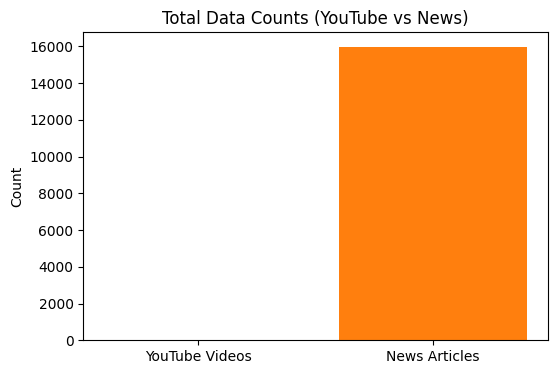

In [19]:
#  Combined Metrics Overview
total_videos = yt_df.shape[0]
total_news = news_df.shape[0]
total_views = yt_df['views'].sum()

print(f"Total YouTube Videos: {total_videos}")
print(f"Total YouTube Views: {total_views:,}")
print(f"Total News Articles: {total_news}")

plt.figure(figsize=(6,4))
plt.bar(['YouTube Videos', 'News Articles'], [total_videos, total_news], color=['#007BFF', '#FF7F0E'])
plt.title("Total Data Counts (YouTube vs News)")
plt.ylabel("Count")
plt.show()


In [21]:
# Export Summary Report


summary = {
    "total_videos": total_videos,
    "total_views": total_views,
    "total_news_articles": total_news
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv("../data/processed/summary_report.csv", index=False)

print(" Summary report saved to data/processed/summary_report.csv")
print(" Data Analysis Completed Successfully!")


 Summary report saved to data/processed/summary_report.csv
 Data Analysis Completed Successfully!
